## TABLE OF CONTENTS

1. [PROBLEM DESCRIPTION]()
2. [THE DATA]()
3. [BACKGROUND RESEARCH]()
4. [READ IN THE DATA]()
    1. [Data Selection]()
5. [GETTING TO KNOW THE DATA]()
    1. [Dataframe 'title_basics_data']()
    2. [Dataframe 'title_ratings_data']()
    3. [Dataframe 'name_basics_data']()
6. [DATA PREPARATION]()
    1. [Create calculated columns]()
        1. [Splitting the key for 'title_basics_data']()
        2. [Calculating the decade of titles]()
        3. [Splitting the key for 'name_basics_data']()
7. [GETTING READY TO COMBINE THE DATASETS]()
8. [COMBINE THE DATASETS]()
9. [COMBINED DATA PREPARATION]()
    1. [Data Replacement]()
    2. [Initial Data Conversion]()
    3. [Redundant Data]()
    4. [Missing Data]()
    5. [Final Data Conversion]()
        1. [Convert to Integer]()
    6. [Rename Columns]()
10. [ANALYSIS]()
    1. [Scatterplot of Rating and Number of Votes]()
    2. [Correlation coefficient of Rating and Number of Votes]()
    3. [Top 10 movies of all time]()
    4. [Top 10 actors/actresses of all time]()
    5. [Top 10 movies for each decade]()
    6. [Top 10 movie genres for each decade]()
11. [SUMMARY OF KEY FINDINGS]()

## 1. PROBLEM DESCRIPTION

In our Python group project revolving around IMDb Non-Commercial Datasets, we delve into a similar journey of data exploration and utilization. Our project centers around accessing subsets of IMDb data, tailored for personal and non-commercial use by customers. The dataset repository offers various subsets of IMDb data, each meticulously crafted and structured to facilitate analysis and exploration. Our objective is to harness these datasets to extract valuable insights and trends within the realm of IMDb content. The project encompasses a myriad of datasets, each offering unique perspectives and facets of IMDb content, ranging from title details to cast and crew information, and user ratings. With each dataset encapsulating valuable information, our aim is to unravel the intricacies of IMDb content and unveil noteworthy patterns and trends within the realm of entertainment.

## 2. THE DATA

IMDb, short for Internet Movie Database, is a comprehensive online database that was launched in 1990 and has been a subsidiary of Amazon.com since 1998. It stands as the most popular and authoritative source for movie, TV, and celebrity content, providing a platform for fans to explore the world of entertainment and make informed decisions about what to watch.

The database boasts millions of entries, including movies, TV shows, entertainment programs, and information about cast and crew members.

Data Location:

The dataset files are available for download from https://datasets.imdbws.com/. The data is updated daily to ensure relevance and accuracy.

Main datasets:

1. title.basics.tsv

* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc.)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

2. title.ratings.tsv
* tconst (string): Alphanumeric unique identifier of the title.
* averageRating: Weighted average of all individual user ratings for the title.
* numVotes: Number of votes the title has received.

3. name.basics.tsv
* nconst (string): Alphanumeric unique identifier of the name/person.
* primaryName: Name by which the person is most often credited.
* birthYear: Year of birth in YYYY format.
* deathYear: Year of death in YYYY format if applicable; otherwise '\N'.
* primaryProfession (array of strings): Top-3 professions of the person.
* knownForTitles (array of tconsts): Titles the person is known for.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

Taking a look at "title_basics_data"

In [284]:
title_basics_data = pd.read_csv('data/title_basics_data.tsv', sep='\t')

title_basics_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Summary of "title_basics_data"

In [285]:
title_basics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1048575 non-null  object
 1   titleType       1048575 non-null  object
 2   primaryTitle    1048575 non-null  object
 3   originalTitle   1048575 non-null  object
 4   isAdult         1048575 non-null  int64 
 5   startYear       1048575 non-null  object
 6   endYear         1048575 non-null  object
 7   runtimeMinutes  1048575 non-null  object
 8   genres          1048575 non-null  object
dtypes: int64(1), object(8)
memory usage: 72.0+ MB


Taking a look at "name_basics_data"

In [286]:
name_basics_data = pd.read_csv('data/name_basics_data.tsv', sep='\t')

name_basics_data.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986"


Taking a look at "title_ratings_data"

In [287]:
title_ratings_data = pd.read_csv('data/title_ratings_data.tsv', sep='\t')

title_ratings_data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731


## 3. BACKGROUND RESEARCH

These datasets offer subsets of IMDb data accessible to customers for personal and non-commercial use, providing valuable insights into diverse facets of IMDb content, such as titles, cast and crew details, and user ratings.

- Title Basics Dataset: Contains over 1 million entries (1,048,575), each uniquely identified by an alphanumeric code (tconst). Provides details such as title type/format, primary and original titles, adult content indicator, start and end years, runtime duration, and associated genres.
- Name Basics Dataset: Also comprises over 1 million entries (1,048,575), with each entry identified by an alphanumeric code (nconst). Includes information about the primary name of individuals, birth and death years, primary professions, and titles they are known for.
- Title Ratings Dataset: Consists of more than 1 million entries (1,048,575), identified by an alphanumeric code (tconst). Contains data on the average rating and number of votes received for each title.

Upon researching each of the aforementioned topics and scrutinizing the associated metadata file for each dataset, the following conclusions can be drawn:

* Identification of the top 10 movies by decade.
* Compilation of the top 10 actors based on the highest number of appearances in movies and their ratings.
* Determination of the top 10 rated movies, considering both ratings and the number of votes received.
* Analysis of the most prevalent genres across the IMDb database.

## 4. READ IN THE DATA

Let's read each file into a pandas dataframe, and then store all the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on. 

In [288]:
data_files = [
    "title_basics_data.tsv",
    "title_ratings_data.tsv",
    "name_basics_data.tsv"
]

imdb_data = {}

for file in data_files:
    d = pd.read_csv("data/{0}".format(file), sep='\t')
    key = file.replace(".tsv", "")
    imdb_data[key] = d

### 4.1 Data Selection

We'll have to filter the data to remove the unnecessary one "runtimeMinutes" in the title_basics_data. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.

In [289]:
imdb_data["title_basics_data"] = imdb_data["title_basics_data"].drop(columns=["runtimeMinutes"])

## 5. GETTING TO KNOW THE DATA

In [290]:
for key, value in imdb_data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head())


 title_basics_data 


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short"



 title_ratings_data 


,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731



 name_basics_data 


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986"


The primary key in each dataset is as follows:

- title_basics_data: Primary Key: tconst

- name_basics_data: Primary Key: nconst

- title_ratings_data: Primary Key: tconst


To combine the three datasets, we can perform a merge operation based on the common key, which is "tconst" in both the title basics dataset and the title ratings dataset.

We can then merge the resulting DataFrame with the name basics dataset based on the common key "tconst", which will be extracted from the "knownForTitles" column in name_basics_data. We'll split the comma-separated values in the "knownForTitles" column of the name_basics_data dataset and explode them into separate rows. This transformation ensures that each 'tconst' value appears in its own row, facilitating the merge operation.

This merge combines information from all three datasets, resulting in a single DataFrame that contains comprehensive information about titles, ratings, and cast/crew members.

### 5.1 Dataframe 'title_basics_data'

In [291]:
imdb_data['title_basics_data'].head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short"


#### A. Column 'isAdult'

In [292]:
round(imdb_data['title_basics_data']['isAdult'].value_counts(normalize=True), 4)

0    0.9592
1    0.0408
Name: isAdult, dtype: float64

There are only 4.08% of movies in df 'title_basics_data' classified for only adults.

#### B. Columns 'startYear'

In [293]:
imdb_data['title_basics_data']['startYear']

0          1894
1          1892
2          1892
3          1892
4          1893
           ... 
1048570    2011
1048571    2019
1048572    2013
1048573    2013
1048574    2004
Name: startYear, Length: 1048575, dtype: object

### 5.2 Dataframe 'title_ratings_data'

In [294]:
imdb_data['title_ratings_data'].head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731


#### A. Column 'Average rating'

In [295]:
imdb_data['title_ratings_data']['averageRating'].describe().apply(lambda x: format(round(x, 2), ','))

count    1,048,575.0
mean            6.91
std             1.38
min              1.0
25%              6.2
50%              7.1
75%              7.8
max             10.0
Name: averageRating, dtype: object

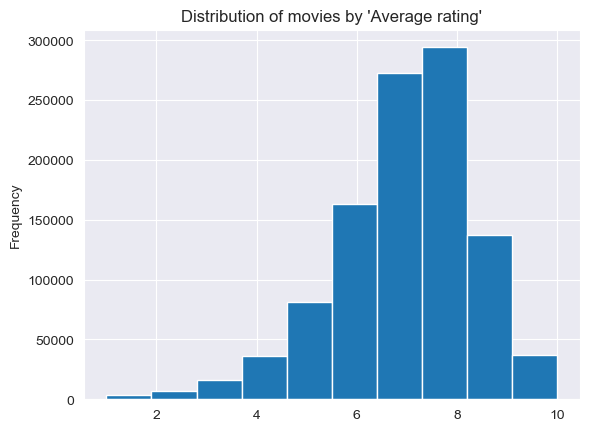

In [296]:
imdb_data['title_ratings_data']['averageRating'].plot(kind='hist', xlabel='Average rating', ylabel='Number of movies',
                                                      title="Distribution of movies by 'Average rating'")
plt.show()

The distribution of the values of 'Average rating' column is left-skewed. And its median is 7.1.

#### B. Column 'Number of votes'

In [297]:
imdb_data['title_ratings_data']['numVotes'].describe().apply(lambda x: format(int(x), ','))

count    1,048,575
mean         1,153
std         19,494
min              5
25%             12
50%             28
75%            107
max      2,865,377
Name: numVotes, dtype: object

The number of votes for the 4th quantile of movies is within 107 and 2,865,377 votes.

### 5.3 Dataframe 'name_basics_data'

#### A. Column 'birthYear'

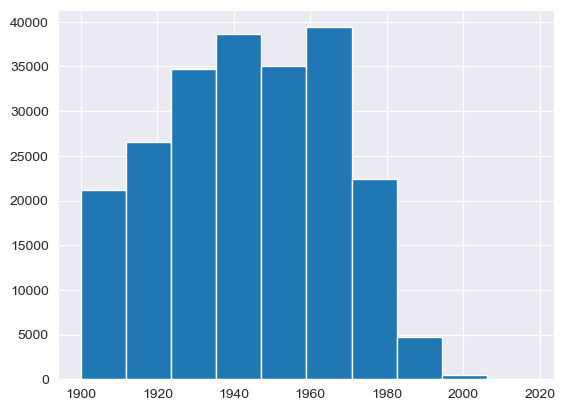

In [298]:
birthyear = pd.to_numeric(imdb_data['name_basics_data']['birthYear'], errors='coerce').dropna()
plt.hist(birthyear[birthyear >= 1900])
plt.show()

The most frequent decades of birth of workers stored in the dataframe are:

In [299]:
birthyear_decade = (birthyear[birthyear >= 1900] // 10 * 10)
birthyear_decade.value_counts().head()

1940.0    33640
1960.0    32809
1950.0    31380
1930.0    29051
1920.0    28123
Name: birthYear, dtype: int64

#### B. Column 'primaryProfession'

The most frequent professions are:

In [300]:
profession = imdb_data['name_basics_data']['primaryProfession'].str.split(',', expand=True).stack().reset_index(
    drop=True)
profession.value_counts()[:10]

actor                353678
actress              214971
miscellaneous        134326
writer               122557
producer             116475
director              87240
camera_department     65885
art_department        51083
soundtrack            44794
sound_department      34284
dtype: int64

#### C. Column 'name_basics_data'

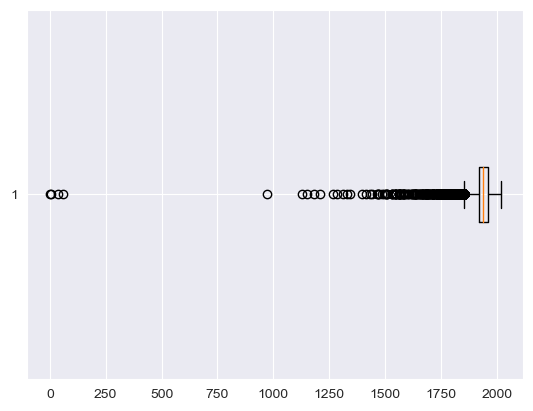

In [301]:
birthyear = pd.to_numeric(imdb_data['name_basics_data']['birthYear'], errors='coerce').dropna()
plt.boxplot(birthyear, vert=False)
plt.show()

## 6. DATA PREPARATION

### 6.1 Create calculated columns

#### A. Splitting the key for 'title_basics_data'

In [302]:
df_titles = imdb_data['title_basics_data']
key_titles = df_titles['genres'].str.split(',', expand=True)

new_genre_columns = ['genre1', 'genre2', 'genre3']

key_titles.columns = new_genre_columns
key_titles

,genre1,genre2,genre3
0,Documentary,Short,None
1,Animation,Short,None
2,Animation,Comedy,Romance
3,Animation,Short,None
4,Comedy,Short,None
...,...,...,...
1048570,Drama,None,None
1048571,Short,None,None
1048572,Comedy,None,None
1048573,Comedy,None,None


In [303]:
df_titles = pd.concat([df_titles, key_titles], axis=1)
df_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,genre1,genre2,genre3
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short",Animation,Short,None
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short",Comedy,Short,None


#### B. Calculating the decade of titles

In [304]:
decades = pd.to_numeric(df_titles['startYear'], errors='coerce')
decades = decades.apply(lambda x: int(x) if pd.notna(x) else 0)
df_titles['startDecade'] = decades

df_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,genre1,genre2,genre3,startDecade
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short",Documentary,Short,None,1894
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short",Animation,Short,None,1892
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance,1892
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short",Animation,Short,None,1892
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short",Comedy,Short,None,1893


#### C. Splitting the key for 'name_basics_data'

In [305]:
df_names = imdb_data['name_basics_data']
key_names = df_names['knownForTitles'].str.split(',', expand=True)

new_title_columns = ['title1', 'title2', 'title3', 'title4', 'title5', 'title6', 'title7']

key_names.columns = new_title_columns
key_names

,title1,title2,title3,title4,title5,title6,title7
0,tt0027125,tt0050419,tt0053137,tt0072308,None,None,None
1,tt0038355,tt0037382,tt0075213,tt0117057,None,None,None
2,tt0049189,tt0054452,tt0056404,tt0057345,None,None,None
3,tt0078723,tt0080455,tt0072562,tt0077975,None,None,None
4,tt0083922,tt0069467,tt0050976,tt0050986,None,None,None
...,...,...,...,...,...,...,...
1048570,tt9028956,None,None,None,None,None,None
1048571,tt9013146,tt9490002,None,None,None,None,None
1048572,tt4368588,None,None,None,None,None,None
1048573,\N,None,None,None,None,None,None


In [306]:
df_names = pd.concat([df_names, key_names], axis=1)
df_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title1,title2,title3,title4,title5,title6,title7
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057",tt0038355,tt0037382,tt0075213,tt0117057,None,None,None
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345",tt0049189,tt0054452,tt0056404,tt0057345,None,None,None
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975",tt0078723,tt0080455,tt0072562,tt0077975,None,None,None
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986",tt0083922,tt0069467,tt0050976,tt0050986,None,None,None


In [307]:
df_ratings = imdb_data['title_ratings_data']
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731


## 7. GETTING READY TO COMBINE THE DATASETS

Before combining the datasets, we need to look for a unique column that can be used as the key for the df.merge() method. As we already know from the data files for each dataset, 'tconst' is the unique column for 'title_basics_data' and 'title_ratings_data', but for 'name_basics_data' it is 'nconst'. However, even if we don't know beforehand whether a certain column is unique and fit to be used as a key, we can use the following function to verify whether a column is unique and can be used as the key.

In [308]:
def can_serve_as_key(df, col_names):
    col_name = col_names[0]

    if col_name not in df.columns:
        col_name = col_names[1]

    nb_unique_values = len(df.loc[:, col_name].unique())
    nb_rows = df.shape[0]

    if nb_unique_values == nb_rows:
        print("YES:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")
    else:
        print("NO:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")

So let's check each column and verify whether each row has a unique 'tconst'.

In [309]:
for key, value in imdb_data.items():
    print("\033[1m", key, "\033[0m")
    can_serve_as_key(value, ["tconst", "nconst"])

 title_basics_data 
YES: 1048575 unique tconst values, 1048575 rows 

 title_ratings_data 
YES: 1048575 unique tconst values, 1048575 rows 

 name_basics_data 
YES: 1048575 unique nconst values, 1048575 rows 


We can see that for 'title_basics_data' and 'title_ratings_data' datasets for which the number of unique 'tconst' values is same as the number of rows. But for the 'name_basics_data' it is 'nconst', which cannot be used to merge it to the other two datasets. We know from experience and looking at the dataset that we need to merge the 'name_basics_data' with the other two datasets on the 'knownForTitles' columns. So, lets take a closer look at the 'name_basics_data'.

In [310]:
imdb_data['name_basics_data'].head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986"


As we can see the 'knowForTitles' column contains the 'tconst' values to merge with the two other datasets. Here, the underlying logic is that each row in the dataset (which is a person) can work in multiple titles (movies, tv series) in the 'title_basics_data' dataset. 

## 8. COMBINE THE DATASET

Finally, we are now in a position to combine all of these datasets. Before starting the merge, let’s quickly visualize the number of  rows in each of the cleaned datasets. This will help us decide which of the four merge strategies (left, right, inner, or outer) we should be using.

In [311]:
row_counts = {
    'df_titles': df_titles.shape[0] / 1000000,
    'df_ratings': df_ratings.shape[0] / 1000000,
    'df_names': df_names.shape[0] / 1000000
}

print(row_counts)

{'df_titles': 1.048575, 'df_ratings': 1.048575, 'df_names': 1.048575}


<Figure size 640x480 with 0 Axes>

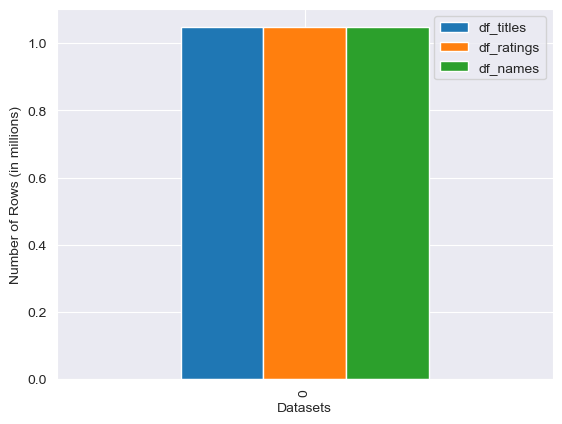

In [312]:
plt.figure()

row_num_df = pd.DataFrame(row_counts, index=[0])
row_num_df.plot.bar()

plt.xlabel('Datasets')
plt.ylabel('Number of Rows (in millions)')
plt.show()

We will first merge "df_titles" with the dataframes "df_ratings" and then "df_names". We can see that all the dataframes to be merged have equal amount of row values than "df_titles", but we only care about the data in the "df_titles". So we'll use a left join.

In [313]:
merged_df = df_titles.merge(df_ratings, on="tconst")
merged_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,genre1,genre2,genre3,startDecade,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short",Documentary,Short,None,1894,5.7,2032
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short",Animation,Short,None,1892,5.7,272
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance,1892,6.5,1973
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short",Animation,Short,None,1892,5.4,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short",Comedy,Short,None,1893,6.2,2731


Next, we will create a 'tconst' column by breaking the 'knownForTitles' column, in order to be able to merge the 'name_basics_data' dataset with the combined 'title_basics_data' and 'title_ratings_data' datasets.

In [314]:
actors_split = df_names.assign(tconst=df_names['knownForTitles'].str.split(',')).explode('tconst')
actors_split.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title1,title2,title3,title4,title5,title6,title7,tconst
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None,tt0027125
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None,tt0050419
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None,tt0053137
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None,tt0072308
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057",tt0038355,tt0037382,tt0075213,tt0117057,None,None,None,tt0038355


Finally, we merge all three datasets.

In [315]:
movies_people_df = pd.merge(merged_df, actors_split, left_on='tconst', right_on='tconst')
movies_people_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,genre1,genre2,genre3,startDecade,averageRating,numVotes,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title1,title2,title3,title4,title5,title6,title7
0,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance,1892,6.5,1973,nm0721526,Émile Reynaud,1844,1918,"director,animation_department,producer","tt0000003,tt16763674,tt16763740,tt13125956",tt0000003,tt16763674,tt16763740,tt13125956,None,None,None
1,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,"Short,Sport",Short,Sport,None,1894,5.4,848,nm0183947,Peter Courtney,1867,1896,actor,tt0000007,tt0000007,None,None,None,None,None,None
2,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,"Documentary,Short",Documentary,Short,None,1894,5.4,2175,nm0653028,Fred Ott,1860,1936,assistant_director,"tt0285265,tt0000008,tt0240514",tt0285265,tt0000008,tt0240514,None,None,None,None
3,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,Romance,Romance,None,None,1894,5.3,208,nm0063086,Blanche Bayliss,1878,1951,actress,tt0000009,tt0000009,None,None,None,None,None,None
4,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,Romance,Romance,None,None,1894,5.3,208,nm0085156,Alexander Black,1859,1940,"director,writer,cinematographer",tt0000009,tt0000009,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904917,tt10145122,movie,The Perfect Secret,Das perfekte Geheimnis,0,2019,\N,"Comedy,Drama,Romance",Comedy,Drama,Romance,2019,6.6,7056,nm0737467,Daniela Schwartz,1973,\N,"art_department,miscellaneous","tt10145122,tt0388858,tt0806910,tt5698320",tt10145122,tt0388858,tt0806910,tt5698320,None,None,None
1904918,tt10145122,movie,The Perfect Secret,Das perfekte Geheimnis,0,2019,\N,"Comedy,Drama,Romance",Comedy,Drama,Romance,2019,6.6,7056,nm0770547,Stephan Scheibengraber,1967,\N,camera_department,"tt0114019,tt10145122,tt0117788,tt0139429",tt0114019,tt10145122,tt0117788,tt0139429,None,None,None
1904919,tt10145122,movie,The Perfect Secret,Das perfekte Geheimnis,0,2019,\N,"Comedy,Drama,Romance",Comedy,Drama,Romance,2019,6.6,7056,nm0777416,Roman Schwartz,\N,\N,"sound_department,composer","tt10145122,tt5651338,tt0367181,tt0100240",tt10145122,tt5651338,tt0367181,tt0100240,None,None,None
1904920,tt10145122,movie,The Perfect Secret,Das perfekte Geheimnis,0,2019,\N,"Comedy,Drama,Romance",Comedy,Drama,Romance,2019,6.6,7056,nm0872339,Till Treutler,\N,\N,"camera_department,set_decorator,miscellaneous","tt2088003,tt1704142,tt0119331,tt10145122",tt2088003,tt1704142,tt0119331,tt10145122,None,None,None


## 9. COMBINED DATA PREPARATION

In [316]:
from functions import col_info, get_decade

In [317]:
col_info(movies_people_df.select_dtypes(include='object'))

The full dataset contains: 1904922 rows and 23 columns. Details for the requested column(s) are as follows:

 tconst : object : 191822 levels
['tt0000003', 'tt0000007', 'tt0000008', 'tt0000009', 'tt0000012'] ...
 titleType : object : 10 levels
['short', 'movie', 'tvMovie', 'tvSeries', 'tvMiniSeries', 'tvShort', 'tvSpecial'] ...
 primaryTitle : object : 171093 levels
['Pauvre Pierrot', 'Corbett and Courtney Before the Kinetograph'] ...
 originalTitle : object : 174873 levels
['Pauvre Pierrot', 'Corbett and Courtney Before the Kinetograph'] ...

 startYear : object : 133 levels
['1892', '1894', '1896', '1895', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904'] ...

 endYear : object : 80 levels
['\\N', '1945', '1949', '1958', '1951', '1950', '1954', '1957', '1952', '1956', '1967', '1971'] ...
 genres : object : 1505 levels
['Animation,Comedy,Romance', 'Short,Sport'] ...

 genre1 : object : 29 levels
['Animation', 'Short', 'Documentary', 'Romance', 'Comedy', 'News'] ...
 genr

### 9.1 Data Replacement

We can see that there are quite a few columns in "movie_and_actor_df" such as 'startYear' which are actually int type but are stored as object type and have incorrect values '\N'. We need to remove '\N' values from the number-like value string to ensure that data conversion afterward is successful.

Let's get a list of all the column names we need.

In [318]:
movies_people_df.filter(regex='(?i)year').columns

Index(['startYear', 'endYear', 'birthYear', 'deathYear'], dtype='object')

Before converting  the values of each of the above columns to integer however, we must first ensure that all are values are stored correctly with no missing or incorrect values.

### 9.2 Initial Data Conversion

In [319]:
year_cols = columns_with_year = [col for col in movies_people_df.columns if 'year' in col.lower()]

for col in year_cols:
    movies_people_df[col] = movies_people_df[col].fillna(0)
    movies_people_df[col] = movies_people_df[col].replace(['\\N'], 0)

In [320]:
for col in year_cols:
    print(f'\033[1m{col}\033[0m')
    display(movies_people_df[col].value_counts())

startYear


1997    74678
1998    73404
1999    73298
2000    69009
1996    68898
        ...  
0          16
1902       15
1904       15
1891        6
1892        1
Name: startYear, Length: 133, dtype: int64

endYear


0       1618400
2001      11270
1998      10596
1999      10533
2000       9247
         ...   
1950         81
2025         77
1949         28
1938         15
1945          8
Name: endYear, Length: 80, dtype: int64

birthYear


0       1251915
1947      10782
1946      10344
1948      10036
1943       9876
         ...   
1641          1
1474          1
1768          1
2006          1
2004          1
Name: birthYear, Length: 356, dtype: int64

deathYear


0       1540069
2020       8379
2021       8173
2011       7636
2018       7570
         ...   
1786          1
1527          1
1591          1
1726          1
1463          1
Name: deathYear, Length: 321, dtype: int64

### 9.3 Redundant Data

In [321]:
col_info(movies_people_df)

The full dataset contains: 1904922 rows and 27 columns. Details for the requested column(s) are as follows:
 tconst : object : 191822 levels
['tt0000003', 'tt0000007', 'tt0000008', 'tt0000009', 'tt0000012'] ...
 titleType : object : 10 levels
['short', 'movie', 'tvMovie', 'tvSeries', 'tvMiniSeries', 'tvShort', 'tvSpecial'] ...
 primaryTitle : object : 171093 levels
['Pauvre Pierrot', 'Corbett and Courtney Before the Kinetograph'] ...
 originalTitle : object : 174873 levels
['Pauvre Pierrot', 'Corbett and Courtney Before the Kinetograph'] ...

 isAdult : int64 : 2 levels
[0, 1] 

 startYear : object : 133 levels
['1892', '1894', '1896', '1895', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904'] ...

 endYear : object : 80 levels
[0, '1945', '1949', '1958', '1951', '1950', '1954', '1957', '1952', '1956', '1967', '1971'] ...
 genres : object : 1505 levels
['Animation,Comedy,Romance', 'Short,Sport'] ...

 genre1 : object : 29 levels
['Animation', 'Short', 'Documentary', 'Roman

From the column info above, we can see that there are a few columns which seem to contain the same information. These columns and the individual datasets they came from are as follows:

- primaryTitle and originalTitle
- genres and genre1, genre2 & genre3
- knownForTitles and title1, title2, title3, title4, title5, title6 & title7

So let's filter the combined dataset to include only these columns and then have a look at it more closely.

In [322]:
title = movies_people_df[['primaryTitle', 'originalTitle']]
title.head(10)

,primaryTitle,originalTitle
0,Pauvre Pierrot,Pauvre Pierrot
1,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph
2,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze
3,Miss Jerry,Miss Jerry
4,Miss Jerry,Miss Jerry
5,Miss Jerry,Miss Jerry
6,The Arrival of a Train,L'arrivée d'un train à La Ciotat
7,The Arrival of a Train,L'arrivée d'un train à La Ciotat
8,The Waterer Watered,L'arroseur arrosé
9,The Waterer Watered,L'arroseur arrosé


In the case of primaryTitle and originalTitle they contain some information. originalTitle contains the names in their original language this is not very relevant as we only care about the english names of the titles in this analysis so we can remove the originalTitle column.

In [323]:
movies_people_df.drop('originalTitle', axis=1, inplace=True)

In [324]:
genre = movies_people_df[['genres', 'genre1', 'genre2', 'genre3']]
genre

,genres,genre1,genre2,genre3
0,"Animation,Comedy,Romance",Animation,Comedy,Romance
1,"Short,Sport",Short,Sport,None
2,"Documentary,Short",Documentary,Short,None
3,Romance,Romance,None,None
4,Romance,Romance,None,None
...,...,...,...,...
1904917,"Comedy,Drama,Romance",Comedy,Drama,Romance
1904918,"Comedy,Drama,Romance",Comedy,Drama,Romance
1904919,"Comedy,Drama,Romance",Comedy,Drama,Romance
1904920,"Comedy,Drama,Romance",Comedy,Drama,Romance


They contain redundant data as the columns genre1, 2 & 3 are derived from the genres' column. And as we did not get to use the genre1, 2 & 3 columns. So we drop these column. Similar reasoning for the knownForTitles column.

In [325]:
movies_people_df.drop(new_genre_columns, axis=1, inplace=True)

movies_people_df.drop(new_title_columns, axis=1, inplace=True)

### 9.4 Missing Data

In [326]:
missing_counts = movies_people_df.isna().sum().sort_values()
missing_one_plus = missing_counts[missing_counts >= 1]
missing_one_plus

primaryProfession    16201
dtype: int64

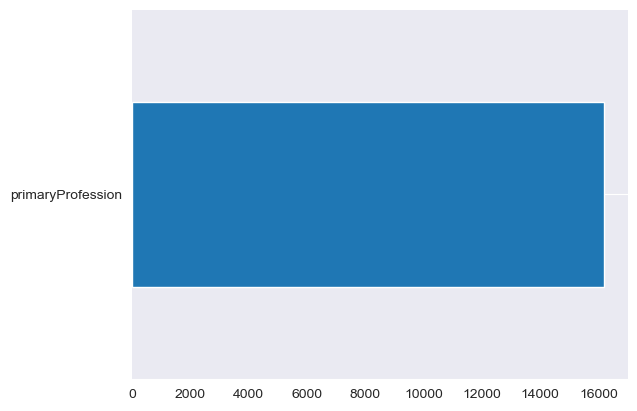

In [327]:
fig, ax = plt.subplots()
missing_one_plus.plot(kind='barh')
plt.grid(axis='x')
sns.despine(left=True, bottom=False)

The only column with missing values among those on the graph above is primaryProfession.

In [328]:
empty_percent_profession = (missing_one_plus['primaryProfession'] / len(movies_people_df)) * 100
print("Percentage of empty data in column 'primaryProfession':", empty_percent_profession)

Percentage of empty data in column 'primaryProfession': 0.8504810170705153


In [329]:
movies_people_df['primaryProfession'].value_counts().head()

actor                371321
actress              264228
miscellaneous         52287
camera_department     42526
writer                35655
Name: primaryProfession, dtype: int64

Since the column has less than 1% missing values, we can now go ahead and impute the missing values for the column with the mode value for that column.

In [330]:
movies_people_df['primaryProfession'] = movies_people_df['primaryProfession'].fillna(
    movies_people_df['primaryProfession'].mode()[0])

movies_people_df['primaryProfession'].value_counts().head()

actor                387522
actress              264228
miscellaneous         52287
camera_department     42526
writer                35655
Name: primaryProfession, dtype: int64

Let's confirm that there are no more missing values in our 'primaryProfessions' column.

In [331]:
movies_people_df['primaryProfession'].isna().sum()

0

In [332]:
count_N_values = movies_people_df.applymap(lambda x: x == '\\N').sum()
count_N_values

tconst                   0
titleType                0
primaryTitle             0
isAdult                  0
startYear                0
endYear                  0
genres               25209
startDecade              0
averageRating            0
numVotes                 0
nconst                   0
primaryName              0
birthYear                0
deathYear                0
primaryProfession        0
knownForTitles           0
dtype: int64

In [333]:
empty_percent_genre = (count_N_values['genres'] / len(movies_people_df)) * 100
print("Percentage of empty data in column 'genres':", empty_percent_genre)

Percentage of empty data in column 'genres': 1.3233612714851317


Here we can see that 'genres' has less than 2% of '\N' values (incorrectly inputted data). As we have done above we will replace these with the mode value of this column.

In [334]:
movies_people_df['genres'].value_counts().head()

Drama                 210500
Comedy                127140
Drama,Romance          81654
Comedy,Drama           58071
Action,Crime,Drama     51580
Name: genres, dtype: int64

In [335]:
movies_people_df['genres'] = movies_people_df['genres'].replace(['\\N'], movies_people_df['genres'].mode()[0])

Let's confirm that there are no more missing values in our 'genre1' column.

In [336]:
count_N_values_2 = (movies_people_df['genres'] == '\\N').sum()
count_N_values_2

0

### 9.5 Final Data Conversion

Now that we have dealt with missing data and done some initial data conversion, we can now go ahead and convert columns that are stored as float/object type into integer type.

#### A. Convert to Integer

In [337]:
col_info(movies_people_df.select_dtypes(include='object'))

The full dataset contains: 1904922 rows and 12 columns. Details for the requested column(s) are as follows:

 tconst : object : 191822 levels
['tt0000003', 'tt0000007', 'tt0000008', 'tt0000009', 'tt0000012'] ...
 titleType : object : 10 levels
['short', 'movie', 'tvMovie', 'tvSeries', 'tvMiniSeries', 'tvShort', 'tvSpecial'] ...
 primaryTitle : object : 171093 levels
['Pauvre Pierrot', 'Corbett and Courtney Before the Kinetograph'] ...

 startYear : object : 133 levels
['1892', '1894', '1896', '1895', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904'] ...

 endYear : object : 80 levels
[0, '1945', '1949', '1958', '1951', '1950', '1954', '1957', '1952', '1956', '1967', '1971'] ...
 genres : object : 1504 levels
['Animation,Comedy,Romance', 'Short,Sport'] ...
 nconst : object : 839960 levels
['nm0721526', 'nm0183947', 'nm0653028', 'nm0063086', 'nm0085156'] ...
 primaryName : object : 795678 levels
['Émile Reynaud', 'Peter Courtney', 'Fred Ott', 'Blanche Bayliss'] ...

 birthY

In [338]:
movies_people_df[year_cols].head()

,startYear,endYear,birthYear,deathYear
0,1892,0,1844,1918
1,1894,0,1867,1896
2,1894,0,1860,1936
3,1894,0,1878,1951
4,1894,0,1859,1940


In [339]:
movies_people_df[year_cols] = movies_people_df[year_cols].astype('int64')

movies_people_df[year_cols].head()

,startYear,endYear,birthYear,deathYear
0,1892,0,1844,1918
1,1894,0,1867,1896
2,1894,0,1860,1936
3,1894,0,1878,1951
4,1894,0,1859,1940


In [340]:
for col in year_cols:
    print(f"Column '{col}' data type: {movies_people_df[col].dtype}")

Column 'startYear' data type: int64
Column 'endYear' data type: int64
Column 'birthYear' data type: int64
Column 'deathYear' data type: int64


### 9.6 Rename Columns

We can now rename all the columns to some meaningful names that can be understood right away without looking into the metadata of the data files for each of the individual datasets the columns came from. For example 'tconst' doesn't indicate what the column is about but 'media_id' does.

In [341]:
movies_people_df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'isAdult', 'startYear',
       'endYear', 'genres', 'startDecade', 'averageRating', 'numVotes',
       'nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [342]:
rename_dict = {
    'tconst': 'Media ID',
    'titleType': 'Media Type',
    'primaryTitle': 'Title',
    'isAdult': 'Is an Adult',
    'startYear': 'Start Year',
    'endYear': 'End Year',
    'genres': 'Genre',
    'startDecade': 'Start Decade',
    'averageRating': 'Rating',
    'numVotes': 'Number of Votes',
    'nconst': 'Person ID',
    'primaryName': 'Person Name',
    'birthYear': 'Birth Year',
    'deathYear': 'Death Year',
    'primaryProfession': 'Profession',
    'knownForTitles': 'Know For Media'
}

In [343]:
movies_people_df.rename(rename_dict, axis=1, inplace=True)

In [344]:
pd.set_option('display.max_columns', None)
movies_people_df

,Media ID,Media Type,Title,Is an Adult,Start Year,End Year,Genre,Start Decade,Rating,Number of Votes,Person ID,Person Name,Birth Year,Death Year,Profession,Know For Media
0,tt0000003,short,Pauvre Pierrot,0,1892,0,"Animation,Comedy,Romance",1892,6.5,1973,nm0721526,Émile Reynaud,1844,1918,"director,animation_department,producer","tt0000003,tt16763674,tt16763740,tt13125956"
1,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,0,"Short,Sport",1894,5.4,848,nm0183947,Peter Courtney,1867,1896,actor,tt0000007
2,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,0,1894,0,"Documentary,Short",1894,5.4,2175,nm0653028,Fred Ott,1860,1936,assistant_director,"tt0285265,tt0000008,tt0240514"
3,tt0000009,movie,Miss Jerry,0,1894,0,Romance,1894,5.3,208,nm0063086,Blanche Bayliss,1878,1951,actress,tt0000009
4,tt0000009,movie,Miss Jerry,0,1894,0,Romance,1894,5.3,208,nm0085156,Alexander Black,1859,1940,"director,writer,cinematographer",tt0000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904917,tt10145122,movie,The Perfect Secret,0,2019,0,"Comedy,Drama,Romance",2019,6.6,7056,nm0737467,Daniela Schwartz,1973,0,"art_department,miscellaneous","tt10145122,tt0388858,tt0806910,tt5698320"
1904918,tt10145122,movie,The Perfect Secret,0,2019,0,"Comedy,Drama,Romance",2019,6.6,7056,nm0770547,Stephan Scheibengraber,1967,0,camera_department,"tt0114019,tt10145122,tt0117788,tt0139429"
1904919,tt10145122,movie,The Perfect Secret,0,2019,0,"Comedy,Drama,Romance",2019,6.6,7056,nm0777416,Roman Schwartz,0,0,"sound_department,composer","tt10145122,tt5651338,tt0367181,tt0100240"
1904920,tt10145122,movie,The Perfect Secret,0,2019,0,"Comedy,Drama,Romance",2019,6.6,7056,nm0872339,Till Treutler,0,0,"camera_department,set_decorator,miscellaneous","tt2088003,tt1704142,tt0119331,tt10145122"


## 10. ANALYSIS

### 10.1 Scatterplot of Rating and Number of Votes

Since, we will be running analysis on 'Titles' we will remove all the duplicates.

In [345]:
movies_title_df_unique = movies_people_df.drop_duplicates(subset=['Title'])

We are interested in finding whether there is any association between rating and number of votes for all media listed in the IMDB table. To graph scatterplot between rating and number of votes, first we need to drop duplicates title from the dataframe.

Now we are going to graph the scatterplot between 'Rating' and 'Number of Votes'

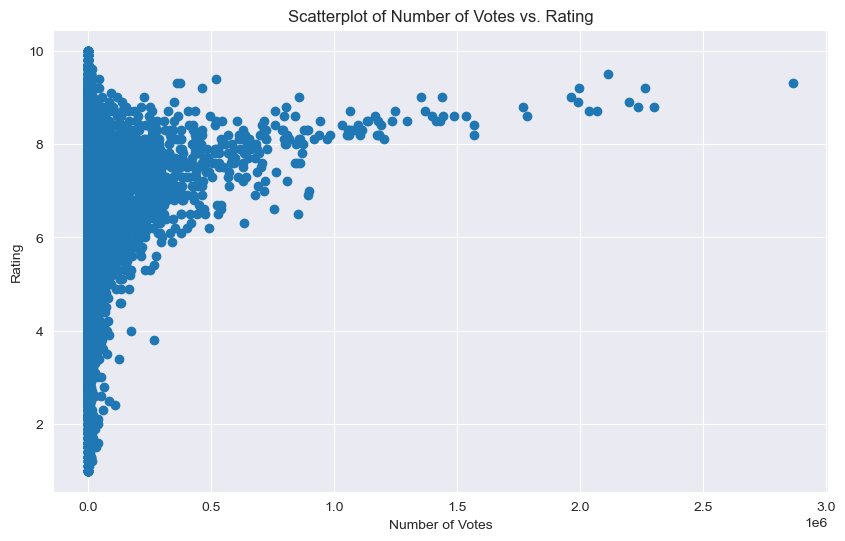

In [346]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_title_df_unique['Number of Votes'], movies_title_df_unique['Rating'])
plt.title('Scatterplot of Number of Votes vs. Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

We can observe from the scatterplot that most of the data has less than 1 million number of votes. Our initial hypothesis is that there is no linear relationship between 'Number of Votes' and 'Rating', but we will formally calculate the correlation coefficient in the next section.

### 10.2 Correlation coefficient of Rating and Number of Votes

Now we will formally calculate the correlation coefficient between the two variables.

In [347]:
correlation = movies_title_df_unique[['Number of Votes', 'Rating']].corr().iloc[0, 1]
print("The correlation coefficient between Number of Votes and Rating is", round(correlation, 4))

The correlation coefficient between Number of Votes and Rating is 0.069


It shows that our initial hypothesis based on the scatterplot is correct that the two variables are not correlated.

### 10.3 Top 10 movies of all time

We want to find the top 10 movies based on ratings and then sorted based on number of votes.
To accomplish this first we are going to isolate movies only from the sorted 

In [348]:
only_movies_df = movies_title_df_unique[movies_title_df_unique['Media Type'] == 'movie']
display_list_1 = ['Title', 'Rating', 'Number of Votes']

only_movies_df.sort_values(by=['Rating', 'Number of Votes'], ascending=[False, False]).head(10)[display_list_1]

,Title,Rating,Number of Votes
1409376,The Last Enemy,10.0,6
748470,All I Know Is,9.9,10
1749394,The People's Story,9.7,22
1154380,Nicole's Revenge,9.6,25
1901630,Cafe Coexistence,9.6,13
970902,Pepper's Pow Wow,9.6,8
1550877,Against Reason and by Force,9.6,5
1827113,Di bale na lang,9.5,34
1859215,Soul of Justice: Thelton Henderson's American ...,9.5,22
779731,Wiping the Tears of Seven Generations,9.5,19


The results are not reliable since it produces a list of top 10 movies with the highest ratings and low number of votes.
As corrective measure, we want to now sort the top 10 movies based on the number of votes first and then the rating.

In [349]:
top_10_movies_df = only_movies_df.sort_values(by=['Number of Votes', 'Rating'], ascending=[False, False]).head(10)[
    display_list_1]

top_10_movies_df.head(10)

,Title,Rating,Number of Votes
865789,The Shawshank Redemption,9.3,2865377
1131049,Fight Club,8.8,2300555
845715,Forrest Gump,8.8,2237034
861861,Pulp Fiction,8.9,2200398
1862436,Interstellar,8.7,2068242
1114406,The Matrix,8.7,2035803
292472,The Godfather,9.2,1995899
1051004,The Lord of the Rings: The Fellowship of the Ring,8.9,1990492
1233100,The Lord of the Rings: The Return of the King,9.0,1962595
918599,Se7en,8.6,1782687


This method produces better results since now we are taking into account the popularity of the movies (as evident with the large number of votes) and the audiences' preference (as evident with the high ratings).

To add visualization to our findings, we are going to create a bar graph for this.

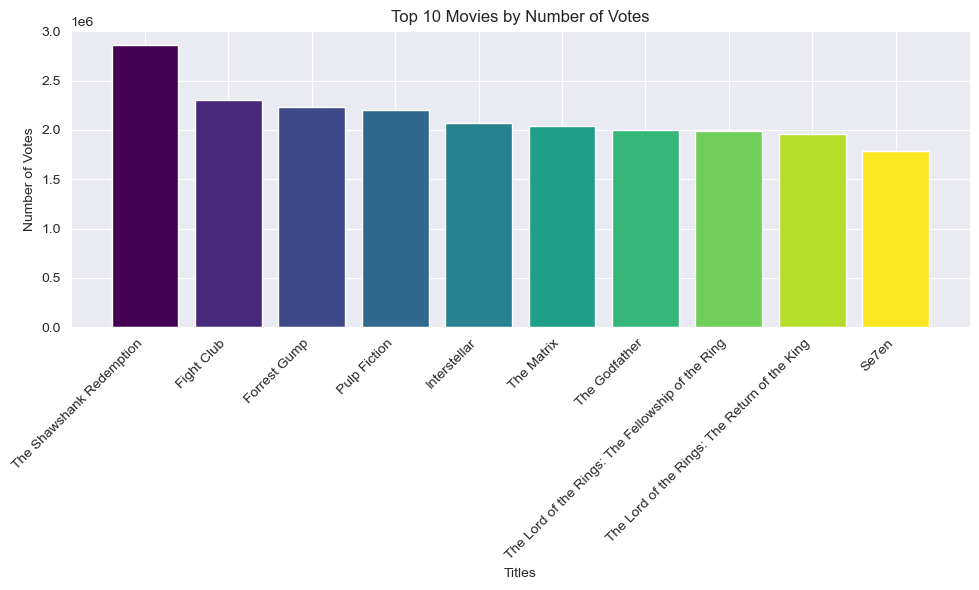

In [350]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_movies_df)))
plt.bar(top_10_movies_df['Title'], top_10_movies_df['Number of Votes'], color=colors)
plt.title('Top 10 Movies by Number of Votes')
plt.xlabel('Titles')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 10.4 Top 10 Actors/Actress of all time

We want to find the top 10 actor of all time, to do this we need to create a new dataframe in which the profession column is filtered such that it contains the word 'actor' or 'actress'.

In [351]:
actors_df = movies_people_df[movies_people_df['Profession'].str.contains('actor|actress', na=False)]
actors_df.head(5)

,Media ID,Media Type,Title,Is an Adult,Start Year,End Year,Genre,Start Decade,Rating,Number of Votes,Person ID,Person Name,Birth Year,Death Year,Profession,Know For Media
1,tt0000007,short,Corbett and Courtney Before the Kinetograph,0,1894,0,"Short,Sport",1894,5.4,848,nm0183947,Peter Courtney,1867,1896,actor,tt0000007
3,tt0000009,movie,Miss Jerry,0,1894,0,Romance,1894,5.3,208,nm0063086,Blanche Bayliss,1878,1951,actress,tt0000009
5,tt0000009,movie,Miss Jerry,0,1894,0,Romance,1894,5.3,208,nm0183823,William Courtenay,1875,1933,actor,"tt0020403,tt0021535,tt0020355,tt0000009"
6,tt0000012,short,The Arrival of a Train,0,1896,0,"Documentary,Short",1896,7.4,12746,nm0525900,Mrs. Auguste Lumiere,1874,1963,actor,"tt0222259,tt0791136,tt0000012,tt0221930"
7,tt0000012,short,The Arrival of a Train,0,1896,0,"Documentary,Short",1896,7.4,12746,nm0525908,Auguste Lumière,1862,1954,"producer,director,actor","tt0000012,tt1740508,tt8488118,tt8485720"


We have successfully created the new dataframe of actors and actress. Now we want to find top 10 actors based on number of times they appeared in any media.

To do this we will group the data by 'Person Name' and count the number of titles for each person. The last step is to sort the counts descending order to get the most frequent names at the top and display the top 10.

In [352]:
title_counts = actors_df.groupby('Person Name')['Title'].count().sort_values(ascending=False)
top_10_person_names = title_counts.head(10)
top_10_person_names.to_frame(name="Count").reset_index()

,Person Name,Count
0,John Williams,34
1,Paul Williams,30
2,John Scott,24
3,Richard Smith,23
4,David Williams,22
5,John Kelly,22
6,John Taylor,22
7,David Allen,21
8,Paul Smith,21
9,David Thomas,20


### 10.5 Top 10 movies for each decade starting in 1900 by number of votes

To accomplish this task we will utilize loop to filter the dataframe into separate decade (excluding endpoints). We then sort the title of the movies based on the largest number of votes and select the top 10.

In [353]:
starting_year = 1900
current_year = datetime.now().year

In [354]:
top_titles_by_decade = {}

for start_year in range(starting_year, current_year, 10):
    end_year = start_year + 10

    if end_year > current_year:
        end_year = current_year

    decade_df = movies_title_df_unique[
        (movies_title_df_unique['Start Year'] > start_year) & (movies_title_df_unique['Start Year'] < end_year)]

    top_10_titles = decade_df.sort_values(by='Number of Votes', ascending=False).head(10)

    display_start, display_end = get_decade(starting_year, current_year, start_year, end_year)

    top_titles_by_decade[f"{display_start}-{display_end}"] = top_10_titles[['Title', 'Number of Votes']]

for decade, titles in top_titles_by_decade.items():
    print('\033[1m' + f"Top 10 Titles for {decade} Decade:" + '\033[0m')
    display(titles.reset_index())

Top 10 Titles for 1900-1910 Decade:


,index,Title,Number of Votes
0,89,A Trip to the Moon,55221
1,93,The Great Train Robbery,20828
2,90,Alice in Wonderland,2853
3,271,A Corner in Wheat,2715
4,123,Dream of a Rarebit Fiend,1977
5,97,The Kingdom of the Fairies,1791
6,1396992,The Eclipse: Courtship of the Sun and Moon,1382
7,127,The 400 Tricks of the Devil,1349
8,102,Rescued by Rover,1302
9,96,Mary Jane's Mishap,1021


Top 10 Titles for 1911-1920 Decade:


,index,Title,Number of Votes
0,2013,The Birth of a Nation,26199
1,3209,Intolerance,16624
2,5588,Broken Blossoms,11000
3,2675,Les vampires,5387
4,3512,The Rink,4222
5,1349,Cabiria,3910
6,1895,Tillie's Punctured Romance,3699
7,2663,The Tramp,3699
8,1462,Gertie the Dinosaur,3618
9,708,Dante's Inferno,3391


Top 10 Titles for 1921-1930 Decade:


,index,Title,Number of Votes
0,13848,Metropolis,184337
1,7892,The Kid,133962
2,12045,The Gold Rush,117936
3,8956,Nosferatu,104689
4,14975,The General,97544
5,11720,Battleship Potemkin,61132
6,16842,The Passion of Joan of Arc,60101
7,11339,Sherlock Jr.,56271
8,15726,Sunrise,53558
9,19269,An Andalusian Dog,53486


Top 10 Titles for 1931-1940 Decade:


,index,Title,Number of Votes
0,51105,Gone with the Wind,332273
1,39445,Modern Times,257713
2,45089,Snow White and the Seven Dwarfs,214105
3,22351,City Lights,194860
4,23223,M,167399
5,52378,Mr. Smith Goes to Washington,120842
6,31220,It Happened One Night,111505
7,28250,King Kong,90375
8,46479,Bringing Up Baby,65713
9,33424,The 39 Steps,61138


Top 10 Titles for 1941-1950 Decade:


,index,Title,Number of Votes
0,62534,Casablanca,602529
1,77714,It's a Wonderful Life,496359
2,58625,Citizen Kane,463467
3,94158,The Third Man,180755
4,86921,Bicycle Thieves,174017
5,70087,Double Indemnity,166453
6,62245,Bambi,153144
7,88073,Rope,152737
8,58902,Dumbo,141235
9,88725,The Treasure of the Sierra Madre,131733


Top 10 Titles for 1951-1960 Decade:


,index,Title,Number of Votes
0,144036,12 Angry Men,856479
1,124973,Rear Window,519032
2,158868,Vertigo,424409
3,125484,Seven Samurai,364574
4,165088,North by Northwest,344275
5,112034,Singin' in the Rain,258856
6,162050,Ben-Hur,251839
7,144822,The Bridge on the River Kwai,232163
8,148571,Paths of Glory,210843
9,149447,The Seventh Seal,197152


Top 10 Titles for 1961-1970 Decade:


,index,Title,Number of Votes
0,225049,"The Good, the Bad and the Ugly",805609
1,243456,2001: A Space Odyssey,714225
2,198316,Dr. Strangelove or: How I Learned to Stop Worr...,515151
3,255063,Once Upon a Time in the West,347328
4,192093,To Kill a Mockingbird,331162
5,189168,Lawrence of Arabia,311980
6,235955,The Graduate,287245
7,219180,For a Few Dollars More,272724
8,220232,The Sound of Music,258595
9,199036,The Great Escape,257428


Top 10 Titles for 1971-1980 Decade:


,index,Title,Number of Votes
0,292472,The Godfather,1995899
1,363349,Star Wars: Episode IV - A New Hope,1440422
2,317453,The Godfather Part II,1354193
3,332440,One Flew Over the Cuckoo's Nest,1065685
4,386132,Alien,942518
5,276505,A Clockwork Orange,876233
6,386729,Apocalypse Now,705275
7,330636,Jaws,654826
8,347787,Rocky,624002
9,319795,Monty Python and the Holy Grail,567350


Top 10 Titles for 1981-1990 Decade:


,index,Title,Number of Votes
0,515646,Back to the Future,1296279
1,474730,Star Wars: Episode VI - Return of the Jedi,1113893
2,435609,Raiders of the Lost Ark,1031407
3,614092,Die Hard,939752
4,505450,The Terminator,917943
5,445019,Blade Runner,817270
6,655374,Indiana Jones and the Last Crusade,806528
7,580094,Full Metal Jacket,785462
8,542457,Aliens,757764
9,644114,Back to the Future Part II,568882


Top 10 Titles for 1991-2000 Decade:


,index,Title,Number of Votes
0,865789,The Shawshank Redemption,2865377
1,1131049,Fight Club,2300555
2,845715,Forrest Gump,2237034
3,861861,Pulp Fiction,2200398
4,1114406,The Matrix,2035803
5,918599,Se7en,1782687
6,736405,The Silence of the Lambs,1535912
7,1056872,Saving Private Ryan,1485434
8,816228,Schindler's List,1439288
9,1049538,The Green Mile,1395815


Top 10 Titles for 2001-2010 Decade:


,index,Title,Number of Votes
0,1883077,Breaking Bad,2111357
1,1051004,The Lord of the Rings: The Fellowship of the Ring,1990492
2,1233100,The Lord of the Rings: The Return of the King,1962595
3,1233386,The Lord of the Rings: The Two Towers,1769410
4,1686539,Inglourious Basterds,1569218
5,1704801,Batman Begins,1566644
6,1823600,The Prestige,1429367
7,1746405,The Departed,1412019
8,1645346,Pirates of the Caribbean: The Curse of the Bla...,1201158
9,1884789,WALL·E,1191330


Top 10 Titles for 2011-2020 Decade:


,index,Title,Number of Votes
0,1890543,Game of Thrones,2263115
1,1862436,Interstellar,2068242
2,1849072,Thor,895404
3,1801104,Captain America: The First Avenger,891760
4,1882932,The Hobbit: An Unexpected Journey,867953
5,1819425,Ant-Man,717536
6,1862594,World War Z,714387
7,1700732,Jurassic World,675810
8,1797083,Life of Pi,663070
9,1812403,Ex Machina,582279


Top 10 Titles for 2021-2024 Decade:


,index,Title,Number of Votes
0,1875681,Jungle Cruise,210861
1,1900512,Army of the Dead,186371
2,1902655,Laal Singh Chaddha,177738
3,1902454,The Little Things,122887
4,1849785,Foundation,93761
5,1835541,Without Remorse,64065
6,1903654,Gangubai Kathiawadi,61480
7,1904289,Thunder Force,45244
8,1902286,The Last Voyage of the Demeter,45041
9,1903812,The Tragedy of Macbeth,39205


### 10.6 Top 3 movies genres for each decade

Now we will display the top 3 movies genres for each decade. To accomplish this, we are going to combine the three genre columns into a single column using concat, making sure we drop 'None' values.

We will count the occurrences of each genre and store the results in dictionary. We then display the top three.

In [355]:
top_genres_by_decade = {}

for start_year in range(starting_year, current_year, 10):
    end_year = start_year + 10
    decade_df = movies_title_df_unique[
        (movies_title_df_unique['Start Year'] > start_year) & (movies_title_df_unique['Start Year'] < end_year)]

    # all_genres = pd.concat([decade_df['Genre 1'], decade_df['Genre 2'], decade_df['Genre 3']]).dropna()
    all_genres = decade_df.assign(genreAnalysis=decade_df['Genre'].str.split(',')).explode('genreAnalysis')
    top_genres = all_genres[['genreAnalysis']].value_counts().head(3)

    display_start, display_end = get_decade(starting_year, current_year, start_year, end_year)

    top_genres_by_decade[f"{display_start}-{display_end}"] = top_genres

for decade, genres in top_genres_by_decade.items():
    print('\033[1m' + f"Top 3 Genres for {decade} Decade:" + '\033[0m')
    display(genres.to_frame(name="Count").reset_index())

Top 3 Genres for 1900-1910 Decade:


,genreAnalysis,Count
0,Short,191
1,Drama,108
2,Comedy,44


Top 3 Genres for 1911-1920 Decade:


,genreAnalysis,Count
0,Drama,1034
1,Short,479
2,Comedy,434


Top 3 Genres for 1921-1930 Decade:


,genreAnalysis,Count
0,Drama,1785
1,Comedy,968
2,Romance,694


Top 3 Genres for 1931-1940 Decade:


,genreAnalysis,Count
0,Drama,3732
1,Comedy,2912
2,Romance,1739


Top 3 Genres for 1941-1950 Decade:


,genreAnalysis,Count
0,Drama,3776
1,Comedy,2412
2,Romance,1223


Top 3 Genres for 1951-1960 Decade:


,genreAnalysis,Count
0,Drama,5505
1,Comedy,3128
2,Romance,1507


Top 3 Genres for 1961-1970 Decade:


,genreAnalysis,Count
0,Drama,7092
1,Comedy,4137
2,Romance,1605


Top 3 Genres for 1971-1980 Decade:


,genreAnalysis,Count
0,Drama,9280
1,Comedy,5131
2,Crime,2097


Top 3 Genres for 1981-1990 Decade:


,genreAnalysis,Count
0,Drama,11135
1,Comedy,6428
2,Action,2856


Top 3 Genres for 1991-2000 Decade:


,genreAnalysis,Count
0,Drama,14575
1,Comedy,8923
2,Action,4060


Top 3 Genres for 2001-2010 Decade:


,genreAnalysis,Count
0,Drama,14006
1,Comedy,9607
2,Documentary,4432


Top 3 Genres for 2011-2020 Decade:


,genreAnalysis,Count
0,Drama,237
1,Comedy,158
2,Documentary,98


Top 3 Genres for 2021-2024 Decade:


,genreAnalysis,Count
0,Drama,42
1,Comedy,24
2,Horror,15


## 11. SUMMARY OF KEY FINDINGS

- There is no correlation between number of votes and ratings for any shows listed in IMDb.
- The top 10 movies of all time (sorted by number of votes) are dominated by movies released in the 1990s.
- Drama and Comedy are consistently making the top 3 movies for any decade starting in the 1900s.
- Although 'Avatar' and 'Avengers: Endgame' are two highest grossing movies of all time, they do not make any of top movies list by decade, suggesting that number of votes and ratings on IMDb website does not have any effect on box office performance. 